In [2]:
import pandas as pd
import plotly.express as px
import scipy.stats as stats

In [3]:
import os
os.getcwd()

'C:\\Users\\UserK\\Desktop\\Ranee\\SW_CAMP\\파이썬을 활용한 머신러닝\\Day03_과제'

In [4]:
df1 = pd.read_csv('06_Data.csv',index_col=0)
print(df1.shape)
df1.info()

(36833, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 36833 entries, 0 to 2205
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  36833 non-null  int64  
 1   날짜          36833 non-null  object 
 2   SKU ID      36833 non-null  int64  
 3   SKU 명       36833 non-null  object 
 4   바코드         36833 non-null  object 
 5   발주가능상태      36833 non-null  object 
 6   입고수량        36833 non-null  int64  
 7   쿠팡출고수량      36833 non-null  int64  
 8   쿠팡현재재고수량    36833 non-null  int64  
 9   자재번호        36833 non-null  int64  
 10  자재명         36833 non-null  object 
 11  카테고리        36833 non-null  object 
 12  입수          36833 non-null  int64  
 13  출고수량        36833 non-null  float64
 14  재고수량        36833 non-null  float64
dtypes: float64(2), int64(7), object(6)
memory usage: 4.5+ MB


C:\Users\UserK\AppData\Local\Temp\ipykernel_15496\3772655590.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('06_Data.csv',index_col=0)


 1. 2019년 5월 대비 8월의 "쿠팡출고수량"이 몇 퍼센트 증가했는지 계산하시오.

In [31]:

df1['날짜'].unique() # 2019년밖에없음

df1['날짜_dt'] = pd.to_datetime(df1['날짜'])
df1['월'] = df1['날짜_dt'].dt.month
pv1 = df1.pivot_table(index='월',values='쿠팡출고수량',aggfunc='sum')
answer = ((pv1.loc[8] - pv1.loc[5]) / pv1.loc[5]) * 100
answer

쿠팡출고수량   -53.256417
dtype: float64

In [9]:
df1['날짜'].unique() # 2019년밖에없음

df1['날짜_dt'] = pd.to_datetime(df1['날짜'])
df1['월'] = df1['날짜_dt'].dt.month
pv1 = df1.pivot_table(index='월',values='쿠팡출고수량',aggfunc='sum').T
answer_1 = (pv1[5]-pv1[8])/pv1[5]
answer_1

쿠팡출고수량    0.532564
dtype: float64

2. 각 카테고리 별 5월 대비 8월의 "쿠팡출고수량"의 증감율을 계산하시오.

In [162]:
df_month = df1.loc[(df1['월'] == 5) | (df1['월'] == 8)]
pv2 = df_month.pivot_table(index='카테고리', columns='월',values='쿠팡출고수량',aggfunc='sum').reset_index()
pv2['증감율'] = ((pv2[5] - pv2[8]) / pv2[5] ) * 100
pv2

월,카테고리,5,8,증감율
0,F&B,23687,9905,58.183814
1,ST,2442,1615,33.865684
2,기타,1647,874,46.933819
3,덴탈케어,74280,30661,58.722402
4,매입브랜드,1769,635,64.104014
5,세탁세제,90089,44910,50.149297
6,주방세제,46048,24490,46.816366
7,헤어케어,62011,28063,54.745126


3. '발주가능상태'에서 '발주중단' 된 데이터의 특성을 파악하고자 한다. '발주중단' 데이터만 추출하여, 카테고리의 빈도수를 확인하고, 연속형 자료의 기술통계량을 계산하시오.

In [70]:
df3 = df1.loc[df1['발주가능상태'] == '발주중단']
print(df3['카테고리'].value_counts())
df3.describe()

카테고리
헤어케어    78
세탁세제    14
덴탈케어     3
Name: count, dtype: int64


,Unnamed: 0,SKU ID,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,입수,출고수량,재고수량,날짜_dt,월
count,95.000000,9.500000e+01,95.000000,95.000000,95.000000,9.500000e+01,95.000000,95.000000,95.000000,95,95.000000
mean,28616.242105,3.559700e+06,14.357895,10.989474,516.526316,6.038457e+06,7.515789,2.095614,318.160424,2019-07-15 00:00:00,7.000000
min,15576.000000,3.097770e+05,0.000000,0.000000,0.000000,5.008395e+06,4.000000,0.000000,0.000000,2019-06-18 00:00:00,6.000000
25%,26683.000000,2.383418e+06,0.000000,2.000000,20.500000,6.068195e+06,4.000000,0.200000,43.036364,2019-07-09 12:00:00,7.000000
50%,29684.000000,3.367647e+06,0.000000,8.000000,164.000000,6.075507e+06,10.000000,0.800000,210.000000,2019-07-15 00:00:00,7.000000
75%,31374.500000,3.367649e+06,0.000000,14.500000,246.000000,6.075508e+06,10.000000,3.375000,379.307692,2019-07-21 00:00:00,7.000000
max,36563.000000,1.023964e+07,216.000000,100.000000,3077.000000,6.075508e+06,10.000000,16.666667,2080.000000,2019-08-07 00:00:00,8.000000
std,4672.622153,2.659679e+06,40.203714,14.443945,938.434514,1.870319e+05,2.763220,2.906945,399.025974,NaN,0.461266


4. 19년도 7월 2번째 주에 '쿠팡출고수량'이 가장 많은 '카테고리'는 무엇인지 확인하시오.

In [81]:
df1['주'] = df1['날짜_dt'].dt.isocalendar().week
df4 = df1.loc[df1['주']==28]
df4.pivot_table(index='카테고리',values='쿠팡출고수량',aggfunc='sum').sort_values(by='쿠팡출고수량',ascending=False).index[0]

'세탁세제'

5. 각 '자재명' 별 '쿠팡출고수량', '입고수량'의 평균을 계산하고, 계산된 결과에서 '쿠팡출고수량'의 상위 10% '자재명'을 'A' / 상위 30%를 'B' / 상위 60%를 'C' / 나머지를 'D'로 '등급분류'라는 파생변수를 생성하고, 각 등급에서 가장 많이 등장한 '카테고리'항목이 무엇인지 확인하시오.

In [11]:
pv3 = df1.pivot_table(index=['자재명','카테고리'], values=['쿠팡출고수량','입고수량'], aggfunc='mean').sort_values(by='쿠팡출고수량',ascending=False).reset_index()
pv3

,자재명,카테고리,입고수량,쿠팡출고수량
0,17리큐 진한겔 2.1L온라인4입(화),세탁세제,912.678571,782.821429
1,18KS샴푸러블리 605mlX3(쿠팡)책,헤어케어,621.190476,535.940476
2,18리큐 진한겔 2.1L(일반)온라인_눕,세탁세제,369.404762,379.476190
3,17리큐 진한겔드럼용 2.1L리필(온4입)(화),세탁세제,307.666667,337.750000
4,19KS샴푸데미지 750ml플러스책,헤어케어,382.666667,310.880952
...,...,...,...,...
349,19샤워메이트스크럽 300쿠키앤크림책,F&B,0.000000,0.000000
350,18더마&모어린스 데일리 밸런싱 600ml,헤어케어,0.000000,0.000000
351,18KS걸리쉬 헤어파우더팩트,헤어케어,0.000000,0.000000
352,18 스파크 스팀100℃ 1.4kg 기획,세탁세제,0.000000,0.000000


In [12]:
cond1 = (pv3['쿠팡출고수량'] >= pv3['쿠팡출고수량'].quantile(0.9))
cond2 = (pv3['쿠팡출고수량'] >= pv3['쿠팡출고수량'].quantile(0.7))
cond3 = (pv3['쿠팡출고수량'] >= pv3['쿠팡출고수량'].quantile(0.4))

pv3['등급분류2'] = 'D'
pv3.loc[cond3,'등급분류2'] = 'C'
pv3.loc[cond2,'등급분류2'] = 'B'
pv3.loc[cond1,'등급분류2'] = 'A'
pv3['label'] = 1
pv3.pivot_table(index='등급분류2',columns='카테고리', values='label' , aggfunc='sum')

카테고리,F&B,ST,기타,덴탈케어,매입브랜드,세탁세제,주방세제,헤어케어
등급분류2,,,,,,,,
A,3.0,NaN,NaN,8.0,NaN,9.0,8.0,8.0
B,9.0,NaN,2.0,15.0,1.0,23.0,11.0,9.0
C,7.0,10.0,1.0,18.0,3.0,38.0,7.0,22.0
D,13.0,32.0,2.0,28.0,2.0,30.0,9.0,26.0


In [118]:
pv3.loc[0:34,'등급분류'] = 'A'
pv3.loc[35:106,'등급분류'] = 'B'
pv3.loc[107:211,'등급분류'] = 'C'
pv3['등급분류'] = pv3['등급분류'].fillna('D')
pv3.pivot_table(index='등급분류',columns='카테고리', values='label' , aggfunc='sum')

# XXXX
# XXXX
# XXXX

카테고리,F&B,ST,기타,덴탈케어,매입브랜드,세탁세제,주방세제,헤어케어
등급분류,,,,,,,,
A,3.0,NaN,NaN,8.0,NaN,9.0,7.0,8.0
B,9.0,NaN,2.0,15.0,1.0,24.0,12.0,9.0
C,7.0,10.0,1.0,18.0,3.0,37.0,7.0,22.0
D,13.0,32.0,2.0,28.0,2.0,30.0,9.0,26.0


In [13]:
pd.crosstab(pv3['등급분류2'],pv3['카테고리'])

카테고리,F&B,ST,기타,덴탈케어,매입브랜드,세탁세제,주방세제,헤어케어
등급분류2,,,,,,,,
A,3,0,0,8,0,9,8,8
B,9,0,2,15,1,23,11,9
C,7,10,1,18,3,38,7,22
D,13,32,2,28,2,30,9,26


6. '카테고리'를 사용자로부터 입력받아, '발주가능상태'에 따른 '월'(날짜로 부터 계산) 별 '쿠팡출고수량'의 합을 계산하여 시각화 하고 해당 그래프를 '카테고리명_월별_쿠팡출고량.png'파일 형태로 저장하는 함수를 만드시오.

In [23]:
def solution() :
    
    print(df1['카테고리'].unique())
    category = input('카테고리를 입력하시오 : ')
    df5 = df1.loc[df1['카테고리'] == category]
    pv4 = df5.pivot_table(index =['월','발주가능상태'] , values='쿠팡출고수량' , aggfunc='sum').reset_index()
    fig1 = px.histogram(pv4, x ='월' , y='쿠팡출고수량',color='발주가능상태')
    
    return fig1.write_html(category+'_월별_쿠팡출고량.html',full_html=False)

def solution2() :
    
    print(df1['카테고리'].unique())
    category = input('카테고리를 입력하시오 : ')
    df5 = df1.loc[df1['카테고리'] == category]
    pv4 = df5.pivot_table(index =['월','발주가능상태'] , values='쿠팡출고수량' , aggfunc='sum').reset_index()
    fig1 = px.histogram(pv4, x ='월' , y='쿠팡출고수량', color='발주가능상태', barmode='group')
    
    return fig1.write_html(category+'_월별_쿠팡출고량.html',full_html=False)

In [17]:
solution()

['세탁세제' '덴탈케어' '헤어케어' '주방세제' 'ST' 'F&B' '기타' '매입브랜드']


카테고리를 입력하시오 :  주방세제


In [26]:
solution2()

['세탁세제' '덴탈케어' '헤어케어' '주방세제' 'ST' 'F&B' '기타' '매입브랜드']


카테고리를 입력하시오 :  F&B


7.'카테고리'빈도수가 가장 많은 항목의 '입고수량'이 높은 상위 100개 데이터를 result_category.xlsx로 저장하시오.

In [140]:
category_top = df1['카테고리'].value_counts().head(1).index[0]
df1.loc[df1['카테고리'] == category_top].sort_values(by='입고수량',ascending=False).head(100).to_excel("result_category.xlsx")

8. 각 '카테고리'별 7월과 8월의 '출고수량'의 '평균'과 '합'의 차이를 계산하시오.

In [30]:
df_month2 = df1.loc[(df1['월'] == 7) | (df1['월'] == 8)]
pv5 = df_month2.pivot_table(index='카테고리' ,columns='월',  values='출고수량' , aggfunc=['mean','sum'])
pv5.columns
pv5[('mean','출고수량평균차이')] = pv5[('mean',7)] - pv5[('mean',8)]
pv5[('sum','출고수량합차이')] =  pv5[('sum',7)] - pv5[('sum',8)]
pv5

mean                      sum                    mean  \
월              7          8             7             8  출고수량평균차이   
카테고리                                                                
F&B     5.898037   7.684165   5320.029762   1275.571429 -1.786128   
ST      0.598392   0.996945    803.640476    158.514286 -0.398553   
기타      3.812354   4.647059    545.166667    158.000000 -0.834705   
덴탈케어    5.856238   7.905919  14148.670635   2988.437500 -2.049681   
매입브랜드   1.199018   1.428363    237.405556     54.277778 -0.229345   
세탁세제   10.987719  13.797862  41500.615000  10417.385556 -2.810143   
주방세제   12.673637  17.275085  18021.911111   4526.072222 -4.601448   
헤어케어    7.695395  10.247534  18061.091667   4242.479167 -2.552139   

                sum  
월           출고수량합차이  
카테고리                 
F&B     4044.458333  
ST       645.126190  
기타       387.166667  
덴탈케어   11160.233135  
매입브랜드    183.127778  
세탁세제   31083.229444  
주방세제   13495.838889  
헤어케어   13818.612500

In [32]:
print(pv5['mean'][7]-pv5['mean'][8])
print(pv5['sum'][7]-pv5['sum'][8])

카테고리
F&B     -1.786128
ST      -0.398553
기타      -0.834705
덴탈케어    -2.049681
매입브랜드   -0.229345
세탁세제    -2.810143
주방세제    -4.601448
헤어케어    -2.552139
dtype: float64
카테고리
F&B       4044.458333
ST         645.126190
기타         387.166667
덴탈케어     11160.233135
매입브랜드      183.127778
세탁세제     31083.229444
주방세제     13495.838889
헤어케어     13818.612500
dtype: float64


9. '입고수량'과 '쿠팡출고수량'의 상관관계를 산점도를 이용해 시각화 하시오.

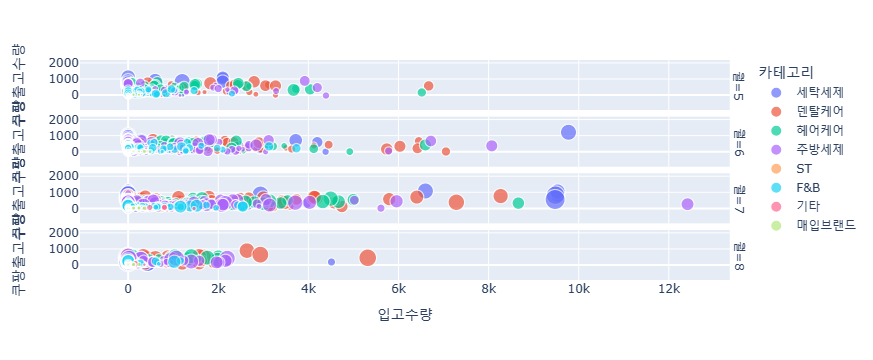

In [36]:
px.scatter(df1,x='입고수량',y='쿠팡출고수량',
           color='카테고리',size='쿠팡현재재고수량',facet_row='월')

10. 폴더 내 3개 데이터를 불러와 아래와 같이 변환 하시오.
    - 기간은 파일 상단에 적힌 기간월을 작성
    - Column 명 '합계'는 앞에 공백이 존재 ' 합계'

In [79]:
df5 = pd.read_excel("07_ERP\\기간별상품매출현황_202306.xlsx")
df5.head(5)

,조회기간-시작 = 20230601,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 636,Unnamed: 637,Unnamed: 638,Unnamed: 639,Unnamed: 640,Unnamed: 641,Unnamed: 642,Unnamed: 643,Unnamed: 644,Unnamed: 645
0,조회기간-종료 = 20230630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,순번,상품코드,상품명,합계,(1154)의정부점,(1155)별내점,(1156)풍산점,(1157)김포한강점,(1158)세종점,(1159)킨텍스점,...,(L21)위시티점,(L23)걸포동점,(L27)통일동산점,(L35)성대점,(L36)병점점,(L38)율전점,(L39)본오점,(L40)검암점,(L44)신길점,(L46)용호점
2,NaN,NaN,NaN,수량,수량,수량,수량,수량,수량,수량,...,수량,수량,수량,수량,수량,수량,수량,수량,수량,수량
3,NaN,NaN,합 계,"2,029,096","6,829","8,374","12,626","11,767","10,912","7,062",...,"2,392","1,291","4,506","2,364","2,739","1,782","3,129","1,712","3,189","2,347"
4,1,0000001801828,자연숨결 식약처 허가 초미세먼지 마스크 대형 60매(KF94),65402,174,239,432,199,220,263,...,0,25,76,72,54,72,15,38,27,89


In [81]:
df6 = pd.read_excel("07_ERP\\기간별상품매출현황_202306.xlsx",skiprows=2)
df6.head(5)

,순번,상품코드,상품명,합계,(1154)의정부점,(1155)별내점,(1156)풍산점,(1157)김포한강점,(1158)세종점,(1159)킨텍스점,...,(L21)위시티점,(L23)걸포동점,(L27)통일동산점,(L35)성대점,(L36)병점점,(L38)율전점,(L39)본오점,(L40)검암점,(L44)신길점,(L46)용호점
0,NaN,NaN,NaN,수량,수량,수량,수량,수량,수량,수량,...,수량,수량,수량,수량,수량,수량,수량,수량,수량,수량
1,NaN,NaN,합 계,"2,029,096","6,829","8,374","12,626","11,767","10,912","7,062",...,"2,392","1,291","4,506","2,364","2,739","1,782","3,129","1,712","3,189","2,347"
2,1.0,1801828.0,자연숨결 식약처 허가 초미세먼지 마스크 대형 60매(KF94),65402,174,239,432,199,220,263,...,0,25,76,72,54,72,15,38,27,89
3,2.0,1801859.0,블루방역황사마스크 65매 KF94,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,40786179.0,클린위즈 매직클리너 얼룩제거 세트,2158,4,9,10,27,0,11,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df2 = pd.read_excel("07_ERP\\기간별상품매출현황_202306.xlsx",skiprows=2).iloc[2:]
df2.head(2)

,순번,상품코드,상품명,합계,(1154)의정부점,(1155)별내점,(1156)풍산점,(1157)김포한강점,(1158)세종점,(1159)킨텍스점,...,(L21)위시티점,(L23)걸포동점,(L27)통일동산점,(L35)성대점,(L36)병점점,(L38)율전점,(L39)본오점,(L40)검암점,(L44)신길점,(L46)용호점
2,1.0,1801828.0,자연숨결 식약처 허가 초미세먼지 마스크 대형 60매(KF94),65402,174,239,432,199,220,263,...,0,25,76,72,54,72,15,38,27,89
3,2.0,1801859.0,블루방역황사마스크 65매 KF94,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df2 = pd.DataFrame()
for i in os.listdir("07_ERP//") : #폴더 안 파일 목록가져오기
    print(i)
    dfn = pd.read_excel("07_ERP//"+i, skiprows=2).iloc[2:]
    dfn2 = dfn.melt(id_vars = ['순번','상품코드','상품명',' 합계'])
    dfn2['기간'] = i.split('.')[0][-2:] + '월'    
    df2 = pd.concat([df2,dfn2])
df3 = df2.rename(columns= {'variable':'지점','value':'판매량'})

기간별상품매출현황_202306.xlsx
기간별상품매출현황_202307.xlsx
기간별상품매출현황_202308.xlsx


In [51]:
df3.shape

(236998, 7)

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236998 entries, 0 to 84759
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   순번      236998 non-null  float64
 1   상품코드    236998 non-null  float64
 2   상품명     236998 non-null  object 
 3    합계     236998 non-null  object 
 4   지점      236998 non-null  object 
 5   판매량     236998 non-null  object 
 6   기간      236998 non-null  object 
dtypes: float64(2), object(5)
memory usage: 14.5+ MB


11. '지점' 중 '판매량'의 합이 가장 높은 2개 지점을 확인하시오.

In [52]:
df3['판매량_int'] = df3['판매량'].astype(int)
df3['합계_int'] = df3[' 합계'].astype(int)

In [55]:
pv6 = df3.pivot_table(index='지점', values='판매량_int', aggfunc='sum').sort_values(by='판매량_int',ascending=False).head(2)
pv6

,판매량_int
지점,
(610)부천점,67612
(600)안양점,62987


12. 앞서 확인한, 2개의 지점의 '판매량'에 대해 각각 정규성 검정을 수행하고, 결론을 작성하시오.

In [57]:
# 귀무가설 : 해당 연속형 데이터의 분포는 정규분포를 따를 것이다.
# 대립가설 : 해당 연속형 데이터의 분포는 정규분포를 따르지 않을 것이다.

cond1 = (df3['지점'] == pv6.index[0])
cond2 = (df3['지점'] == pv6.index[1])

print(stats.normaltest(df3.loc[cond1]['판매량_int'])) # pvalue=5.6151110292193245e-86 < 0.05 ->  귀무가설 기각
print(stats.normaltest(df3.loc[cond2]['판매량_int'])) # =4.71347161815466e-64 < 0.05 -> 귀무가설 기각

NormaltestResult(statistic=392.59371327162387, pvalue=5.6151110292193245e-86)
NormaltestResult(statistic=291.630042482356, pvalue=4.71347161815466e-64)


13. 앞서 확인한, 2개의 지점의 '판매량'의 대표값(중앙값)의 차이를 계산하고자 한다. 가설을 수립하고, Rank Sum Test를 이용해 가설검정을 수행하시오 .

In [58]:
# 귀무가설 : 부천점과 안양점의 판매량의 대표값의 차이가 없다.
# 대립가설 : 부천점과 안양점의 판매량의 대표값의 차이가 있다.

stats.ranksums(df3.loc[cond1]['판매량_int'],df3.loc[cond2]['판매량_int'])
# 0.8149463770358858 > 0.05 -> 대립가설 기각 -> 귀무가설 참 

RanksumsResult(statistic=0.23404972309949237, pvalue=0.8149463770358858)

14. 앞서 확인한, 2개의 지점의 '판매량'의 Histogram을 Plotly라이브러리로 시각화 하시오.

In [ ]:
px.histogram(df3.loc[cond2]['판매량_int'])

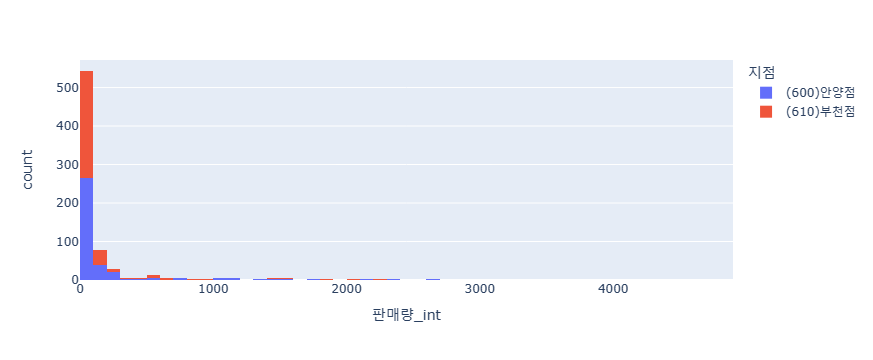

In [63]:
px.histogram(df3.loc[cond1 | cond2] ,x='판매량_int',color='지점')

15. '기간'별 가장 '판매량'의 '합'이 높은 '지점'을 확인하고, 특정 '기간' (월)을 입력했을 때, 해당 월의 '지점' 별 '판매량'의 합을 result_{월}.xlsx로 저장하는 함수를 생성하시오.

In [64]:
def solution3() :
    print(df3.pivot_table(index='기간', values='판매량_int', aggfunc='sum'))
    data2 = input('기간(월)을 입력하시오 : ')
    cond1 = (df3['기간'] == data2)
    df3.loc[cond1].pivot_table(index='지점', values='판매량_int', aggfunc='sum').to_excel('result_'+data2+'.xlsx')
    return 

In [66]:
 solution3()

     판매량_int
기간          
06월  2029096
07월  2278594
08월  2389611


기간(월)을 입력하시오 :  06월


16. 상품명'에 '마스크'와'휴지' 제품을 나누어 분석하고자 한다. 상품명을 '휴지'와 '마스크'로 분류한 뒤, (나머지는 '기타') '상품분류'라는 파생변수를 만들어, 두 상품의 '판매량'의 대표값의 차이를 가설 검정 하시오.
    - 가설 수립 및 결론도 작성하셔야 합니다.

In [67]:
def solution4(row) :
    if '마스크' in row :
        return '마스크'
    elif '휴지' in row :
        return '휴지'
    else : return '기타'

df3['상품분류'] = df3['상품명'].apply(solution4)
df3['상품분류'].value_counts()

상품분류
기타     194274
마스크     21362
휴지      21362
Name: count, dtype: int64

In [68]:
# 16-1 휴지 제품과 마스크 제품의 판매량 데이터가 정규성을 따르는지 확인
# 귀무가설 : 해당 연속형 자료는 정규분포를 따른다.
# 대립가설 : 해당 연속형 자료는 정규분포를 따르지않는다.

cond1 = df3['상품분류'] == '휴지'
cond2 = df3['상품분류'] == '마스크'

print(stats.normaltest(df3.loc[cond1]['판매량_int']))
print(stats.normaltest(df3.loc[cond2]['판매량_int']))

# pvalue=0.0 < 0.05 -> 귀무가설 기각 -> 대립가설 참 -> 정규분포따르지X

NormaltestResult(statistic=30664.231154107765, pvalue=0.0)
NormaltestResult(statistic=31820.563309226873, pvalue=0.0)


In [76]:
# 16-2 (연속형 자료가 정규분포가 아닌) 휴지 제품과 마스크 제품의 판매량의 대표값이 차이가 있는가?
# 귀무가설 : 두 집단의 판매량의 대표값(중앙값)의 차이는 없다.
# 대립가설 : 두 집단의 판매량의 대표값(중앙값)의 차이는 있다.

stats.ranksums(df3.loc[cond1]['판매량_int'],df3.loc[cond2]['판매량_int'])
# pvalue=1.0063403187290814e-45 < 0.05 -> 귀무가설 기각 -> 대립가설 참 -> 중앙값 차이 있다

RanksumsResult(statistic=-14.193416467479825, pvalue=1.0063403187290814e-45)

In [77]:
# 16-3-1 (연속형 자료가 정규성을 따른다고 가정) 휴지 제품과 마스크 제품의 판매량의 등분산성 확인
# 귀무가설 : 두 집단의 판매량의 분산은 같다고 볼 수 있다.
# 대립가설 : 두 집단의 판매량의 분산은 다르다고 볼 수 있다.

stats.bartlett(df3.loc[cond1]['판매량_int'],df3.loc[cond2]['판매량_int'])
#  pvalue=0.0 < 0.05 -> 귀무가설 기각 -> 대립가설 참

BartlettResult(statistic=1763.0232663592642, pvalue=0.0)

In [78]:
# 16-3-2 (정규성을 따르며, 분산은 다른 이분산) 휴지 제품과 마스크 제품의 판매량의 평균차이가 있는가?
# 귀무가설 : 두 집단의 판매량의 대표값(평균)의 차이는 없다.
# 대립가설 : 두 집단의 판매량의 대표값(평균)의 차이는 있다.

stats.ttest_ind(df3.loc[cond1]['판매량_int'],
                df3.loc[cond2]['판매량_int'],
                equal_var = False) # equal_var = :  등분산/이분산 
#  pvalue=0.08897002611313275 > 0.05 -> 귀무가설 참 -> 평균의 차이는 없다

TtestResult(statistic=1.7008978408755762, pvalue=0.08897002611313275, df=39585.91392940274)